**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*5_Predictions* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: March 4, 2020 <br>
Date Updated: March 4, 2020

----

**Note: This needs to be run from the tfcs109a Conda Environment**

**Load Packages**

In [1]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pickle

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import export_graphviz
import pydot

import statsmodels.formula.api as sm
from pprint import pprint

import itertools

Using TensorFlow backend.


----

**Load Data**

In [2]:
# Load Data

final_df = pd.read_csv('../../2_Inputs/Final/final_df_knn.csv')
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1970.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.003300,8.3546,-23616.0,43.52,37.409,7.45,2.631613,29.48,-0.979531,1970.0
1,Afghanistan,1971.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.201934,8.5824,-22903.2,43.88,37.930,7.45,2.635235,29.68,-0.956633,1971.0
2,Afghanistan,1972.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,72.199611,8.7142,-20000.0,26.32,38.461,7.45,2.627456,26.70,-1.043920,1972.0
3,Afghanistan,1973.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.824106,6.7992,-14881.2,35.16,39.003,7.45,2.609505,27.00,-0.792020,1973.0
4,Afghanistan,1976.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,77.278710,4.2436,-261777.8,38.10,40.715,7.45,2.558353,28.06,-0.555133,1976.0


In [3]:
# Load In Sample

in_sample = pd.read_csv('../../2_Inputs/Final/in_sample.csv')
in_sample = in_sample.drop(["Unnamed: 0"], axis = 1)
in_sample.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1970.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.003300,8.3546,-23616.0,43.52,37.409,7.45,2.631613,29.48,-0.979531,1970.0
1,Afghanistan,1971.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.201934,8.5824,-22903.2,43.88,37.930,7.45,2.635235,29.68,-0.956633,1971.0
2,Afghanistan,1972.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,72.199611,8.7142,-20000.0,26.32,38.461,7.45,2.627456,26.70,-1.043920,1972.0
3,Afghanistan,1973.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.824106,6.7992,-14881.2,35.16,39.003,7.45,2.609505,27.00,-0.792020,1973.0
4,Afghanistan,1976.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,77.278710,4.2436,-261777.8,38.10,40.715,7.45,2.558353,28.06,-0.555133,1976.0


In [4]:
# Load Lock Box

lock_box = pd.read_csv('../../2_Inputs/Final/lock_box.csv')
lock_box = lock_box.drop(["Unnamed: 0"], axis = 1)
lock_box.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,57.110746,1.679,-16498.2,28.60,63.3770,4.9760,2.478662,24.50,-1.117563,2015.0
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,58.104539,1.634,-16498.2,29.50,63.7630,4.8000,2.519923,25.64,-1.039843,2016.0
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.008129,1.559,-314602.0,29.80,64.1300,4.6330,2.554251,22.98,-0.992470,2017.0
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.244647,1.542,-32328.2,27.96,63.3522,4.9862,2.584927,25.86,-0.994720,2018.0
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,...,73.166459,17.080,-131596.4,6.00,78.0250,1.6770,12.626548,17.16,0.157149,2015.0


In [5]:
# Split Lock Box

lock_box = lock_box.loc[:,'longitude':]
lock_box_x = lock_box.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
lock_box_y = lock_box['Foreign direct investment, net inflows (% of GDP)']

print(lock_box_x.shape)
print(lock_box_y.shape)

(757, 2306)
(757,)


In [6]:
# Check for all zeroes

#print("Xs: ", Xs.columns[(Xs == 0).all()])
lock_box_x = lock_box_x.drop(['EBRD..private.nonguaranteed..NFL..current.US..'], axis = 1)
lock_box_x.shape

(757, 2305)

In [7]:
# Normalize X-Values

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
lock_box_Xs_normalized = scaler.fit_transform(lock_box_x)
lock_box_Xs_normalized.shape

(757, 2305)

In [8]:
# Load Validation Table

results = pd.read_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 3.csv')
results = results.drop(["Unnamed: 0"], axis = 1)
results.head()

,Model Name,Model Type,Minimum RMSE,Variables
0,Linear Regression,Linear Model,238375.62,2306
1,Ridge Regression,Linear Model,659882.56,2305
2,Lasso Regression,Linear Model,29.05,39
3,Random Forest,Tree-Based,50.88,2303
4,Deep Neural Networks (DNN),Neural Networks,19.24,2302


---

**Import Winning Model: Neural Networks** <br>
Docs: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [9]:
# load json and create model
json_file2 = open("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_optimum.json", 'r')
#print(json_file)
loaded_model_json2 = json_file2.read()
#print(loaded_model_json)
json_file2.close()
loaded_model2 = tf.keras.models.model_from_json(loaded_model_json2)
# load weights into new model
loaded_model2.load_weights("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model2_optimum.h5")
print("Loaded model 2 optimum from disk")

Loaded model 2 optimum from disk


In [10]:
# load json and create model
json_file1 = open("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model1.json", 'r')
#print(json_file)
loaded_model_json1 = json_file1.read()
#print(loaded_model_json)
json_file1.close()
loaded_model1 = tf.keras.models.model_from_json(loaded_model_json1)
# load weights into new model
loaded_model1.load_weights("../../3_Outputs/Model Selection/Neural Networks/DNN Model/dnn_model1.h5")
print("Loaded model 1 from disk")

Loaded model 1 from disk


In [11]:
## load the model from disk
#rf_optimum = pickle.load(open('../../3_Outputs/Model Selection/Random Forest/rf_optimum_model.sav', 'rb'))
#print("Load rf optimum from disk")

----

**Predict Values Using Neural Networks**

*Predict Optimum*

In [12]:
# Create Predictions

prediction_optimum = loaded_model2.predict(lock_box_Xs_normalized)

In [13]:
# View Predictions

y_pred_opt = prediction_optimum
print(len(y_pred_opt))
print('Prediction with scaling - {}'.format(y_pred_opt[0:10]))

757
Prediction with scaling - [[0.9088301 ]
 [0.8110003 ]
 [0.79605967]
 [0.71101636]
 [1.5588001 ]
 [2.3058822 ]
 [1.5318108 ]
 [1.457562  ]
 [0.823535  ]
 [0.6677168 ]]


In [14]:
y_pred_opt_df = pd.DataFrame(data = y_pred_opt)
y_pred_opt_df.head(25)

,0
0,0.908830
1,0.811000
2,0.796060
3,0.711016
4,1.558800
5,2.305882
6,1.531811
7,1.457562
8,0.823535
9,0.667717


*Predict Model 1*

In [15]:
# Create Predictions

prediction1 = loaded_model1.predict(lock_box_Xs_normalized)

In [16]:
# View Predictions

y_pred1 = prediction1
print(len(y_pred1))
print('Prediction with scaling - {}'.format(y_pred1[0:10]))

757
Prediction with scaling - [[3.749651 ]
 [3.897462 ]
 [3.9955275]
 [3.9323404]
 [7.6668534]
 [7.404028 ]
 [7.588384 ]
 [7.5666766]
 [6.256288 ]
 [5.87713  ]]


In [17]:
y_pred_1_df = pd.DataFrame(data = y_pred1)
y_pred_1_df.head(25)

,0
0,3.749651
1,3.897462
2,3.995528
3,3.932340
4,7.666853
5,7.404028
6,7.588384
7,7.566677
8,6.256288
9,5.877130


In [18]:
lock_box_y.head(25)

0     0.849679
1     0.483360
2     0.255222
3     0.718898
4     8.690477
5     8.804978
6     7.852228
7     7.992357
8    -0.324014
9     1.023704
10    0.717464
11    0.866905
12    8.630605
13   -0.177523
14   -6.057209
15   -5.420745
16    8.039283
17    5.613403
18    7.693360
19    7.233055
20    1.977135
21    0.584750
22    1.791961
23    2.283806
24    1.744737
Name: Foreign direct investment, net inflows (% of GDP), dtype: float64

*****

**Create Predicted Values DF**

*Create predicted df for every country and every year*

In [19]:
# Reload Lockbox

lock_box = pd.read_csv('../../2_Inputs/Final/lock_box.csv')
lock_box = lock_box.drop(["Unnamed: 0"], axis = 1)
lock_box.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,57.110746,1.679,-16498.2,28.60,63.3770,4.9760,2.478662,24.50,-1.117563,2015.0
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,58.104539,1.634,-16498.2,29.50,63.7630,4.8000,2.519923,25.64,-1.039843,2016.0
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.008129,1.559,-314602.0,29.80,64.1300,4.6330,2.554251,22.98,-0.992470,2017.0
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.244647,1.542,-32328.2,27.96,63.3522,4.9862,2.584927,25.86,-0.994720,2018.0
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,...,73.166459,17.080,-131596.4,6.00,78.0250,1.6770,12.626548,17.16,0.157149,2015.0


In [20]:
# Create Predicted Values Df

pred_df = lock_box.loc[:, :'latitude']
print(pred_df.shape)
pred_df.head()

(757, 11)


,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.3317


In [21]:
# View lockbox

print(lock_box_y.shape)
lock_box_y.head()

(757,)


0    0.849679
1    0.483360
2    0.255222
3    0.718898
4    8.690477
Name: Foreign direct investment, net inflows (% of GDP), dtype: float64

In [22]:
# Concat pred_df and lock_box_y

pred_df = pd.concat([pred_df, lock_box_y], axis=1)
print(pred_df.shape)
pred_df.head()

(757, 12)


,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,"Foreign direct investment, net inflows (% of GDP)"
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.849679
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.483360
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.255222
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.718898
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.3317,8.690477


In [23]:
# Concat y_pred_opt_df

pred_df = pd.concat([pred_df, y_pred_opt_df], axis=1)
print(pred_df.shape)
pred_df.head()

(757, 13)


,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,"Foreign direct investment, net inflows (% of GDP)",0
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.849679,0.908830
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.483360,0.811000
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.255222,0.796060
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.718898,0.711016
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.3317,8.690477,1.558800


In [24]:
## Print column names
#
#print(pred_df.columns)

In [25]:
# Rename Columns

pred_df = pred_df.rename(columns={"Foreign direct investment, net inflows (% of GDP)": "Actual FDI Inflow (% of GDP)", 0: "Predicted FDI Inflow (% of GDP)"})
pred_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP)
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.849679,0.908830
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.483360,0.811000
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.255222,0.796060
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.718898,0.711016
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.3317,8.690477,1.558800


In [26]:
# Create new columns

pred_df["Difference"] = pred_df["Predicted FDI Inflow (% of GDP)"] - pred_df["Actual FDI Inflow (% of GDP)"]
pred_df["Percent Difference (%)"] = ((pred_df["Predicted FDI Inflow (% of GDP)"] / abs(pred_df["Actual FDI Inflow (% of GDP)"])) - 1) * 100
pred_df["Over- or Under- Investment"] = "Over-Invested"

pred_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.849679,0.908830,0.059151,6.961543,Over-Invested
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.483360,0.811000,0.327640,67.783820,Over-Invested
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.255222,0.796060,0.540837,211.908292,Over-Invested
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.718898,0.711016,-0.007882,-1.096350,Over-Invested
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.3317,8.690477,1.558800,-7.131677,-82.063124,Over-Invested


In [27]:
# Conditional formatting to change over- and under-investment

for i, row in pred_df.iterrows():
    if row['Predicted FDI Inflow (% of GDP)'] > row['Actual FDI Inflow (% of GDP)']:
        pred_df.loc[i, "Over- or Under- Investment"] = "Under-Invested"
        #print(row['country'], row['Difference'], "Under-Invested")
    elif row['Predicted FDI Inflow (% of GDP)'] == row['Actual FDI Inflow (% of GDP)']:
        pred_df.loc[i, "Over- or Under- Investment"] = "Properly Valued"

In [28]:
# Confirm Results

pred_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.849679,0.908830,0.059151,6.961543,Under-Invested
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.483360,0.811000,0.327640,67.783820,Under-Invested
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.255222,0.796060,0.540837,211.908292,Under-Invested
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228,0.718898,0.711016,-0.007882,-1.096350,Over-Invested
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.3317,8.690477,1.558800,-7.131677,-82.063124,Over-Invested


*Aggregate by country across years*

In [29]:
# Group by

pred_df_agg = pred_df.groupby(['country', 'code', 'region', 'incomeLevel', 'lendingType'])[['Actual FDI Inflow (% of GDP)', 'Predicted FDI Inflow (% of GDP)']].agg('mean')

In [30]:
# View Grouping

pred_df_agg.head()

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP)
country,code,region,incomeLevel,lendingType,,
Afghanistan,AFG,South Asia,Low income,IDA,0.576790,0.806727
Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,8.335010,1.713514
Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,0.571015,0.746400
Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,-0.756218,0.618050
Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD,7.144775,4.312068


In [31]:
pred_df_agg["Difference"] = pred_df_agg["Predicted FDI Inflow (% of GDP)"] - pred_df_agg["Actual FDI Inflow (% of GDP)"]
pred_df_agg["Percent Difference (%)"] = ((pred_df_agg["Predicted FDI Inflow (% of GDP)"] / abs(pred_df_agg["Actual FDI Inflow (% of GDP)"])) - 1) * 100
pred_df_agg["Over- or Under- Investment"] = "Over-Invested"

pred_df_agg.head()

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
country,code,region,incomeLevel,lendingType,,,,,
Afghanistan,AFG,South Asia,Low income,IDA,0.576790,0.806727,0.229937,39.864874,Over-Invested
Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,8.335010,1.713514,-6.621496,-79.441971,Over-Invested
Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,0.571015,0.746400,0.175385,30.714518,Over-Invested
Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,-0.756218,0.618050,1.374268,-18.270879,Over-Invested
Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD,7.144775,4.312068,-2.832707,-39.647255,Over-Invested


In [32]:
# Conditional formatting to change over- and under-investment

for i, row in pred_df_agg.iterrows():
    if row['Predicted FDI Inflow (% of GDP)'] > row['Actual FDI Inflow (% of GDP)']:
        pred_df_agg.loc[i, "Over- or Under- Investment"] = "Under-Invested"
        #print(row['country'], row['Difference'], "Under-Invested")
    elif row['Predicted FDI Inflow (% of GDP)'] == row['Actual FDI Inflow (% of GDP)']:
        pred_df_agg.loc[i, "Over- or Under- Investment"] = "Properly Valued"
        
pred_df_agg.head()

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
country,code,region,incomeLevel,lendingType,,,,,
Afghanistan,AFG,South Asia,Low income,IDA,0.576790,0.806727,0.229937,39.864874,Under-Invested
Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,8.335010,1.713514,-6.621496,-79.441971,Over-Invested
Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,0.571015,0.746400,0.175385,30.714518,Under-Invested
Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,-0.756218,0.618050,1.374268,-18.270879,Under-Invested
Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD,7.144775,4.312068,-2.832707,-39.647255,Over-Invested


In [33]:
# Output Data

pred_df.to_csv('../../3_Outputs/Results/Predicted FDI Table by Year.csv')
pred_df_agg.to_csv('../../3_Outputs/Results/Predicted FDI Table by Country.csv')

*Examine the Results*

In [34]:
# View 10 most under-invested countries in the world

under_valued_df = pred_df_agg.nlargest(10, 'Percent Difference (%)')
under_valued_df

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
country,code,region,incomeLevel,lendingType,,,,,
Libya,LBY,Middle East & North Africa,Upper middle income,IBRD,0.000000,1.756840,1.756840,inf,Under-Invested
Nauru,NRU,East Asia & Pacific,Upper middle income,IBRD,0.000000,0.829912,0.829912,inf,Under-Invested
South Sudan,SSD,Sub-Saharan Africa,Low income,IDA,0.001250,0.871549,0.870299,6.961117e+04,Under-Invested
Turks and Caicos Islands,TCA,Latin America & Caribbean,High income,Not classified,0.086777,1.748015,1.661239,1.914388e+03,Under-Invested
Bhutan,BTN,South Asia,Lower middle income,IDA,0.074574,1.245596,1.171023,1.570288e+03,Under-Invested
Eswatini,SWZ,Sub-Saharan Africa,Lower middle income,IBRD,0.168657,1.426148,1.257491,7.455930e+02,Under-Invested
Dominica,DMA,Latin America & Caribbean,Upper middle income,Blend,0.507702,2.905340,2.397639,4.722535e+02,Under-Invested
Papua New Guinea,PNG,East Asia & Pacific,Lower middle income,Blend,0.344826,1.687073,1.342247,3.892535e+02,Under-Invested
Kuwait,KWT,Middle East & North Africa,High income,Not classified,0.148441,0.705204,0.556763,3.750727e+02,Under-Invested


In [35]:
# View 10 most over-invested countries in the world

over_valued_df = pred_df_agg.nsmallest(10, 'Percent Difference (%)')
over_valued_df

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
country,code,region,incomeLevel,lendingType,,,,,
United States,USA,North America,High income,Not classified,2.128764,-2.375880,-4.504644,-211.608404,Over-Invested
India,IND,South Asia,Lower middle income,IBRD,1.772302,-0.532496,-2.304798,-130.045443,Over-Invested
Indonesia,IDN,East Asia & Pacific,Lower middle income,IBRD,1.681170,-0.357198,-2.038368,-121.247008,Over-Invested
Argentina,ARG,Latin America & Caribbean,Upper middle income,IBRD,1.659413,-0.342179,-2.001592,-120.620499,Over-Invested
"Egypt, Arab Rep.",EGY,Middle East & North Africa,Lower middle income,IBRD,2.593392,-0.064219,-2.657610,-102.476237,Over-Invested
Colombia,COL,Latin America & Caribbean,Upper middle income,IBRD,4.189615,0.258504,-3.931111,-93.829896,Over-Invested
Vietnam,VNM,East Asia & Pacific,Lower middle income,IBRD,6.216571,0.435950,-5.780622,-92.987294,Over-Invested
Turkey,TUR,Europe & Central Asia,Upper middle income,IBRD,1.725486,0.122018,-1.603468,-92.928474,Over-Invested
Russian Federation,RUS,Europe & Central Asia,Upper middle income,IBRD,1.344567,0.109894,-1.234673,-91.826838,Over-Invested


In [36]:
graphic_df = pd.concat([over_valued_df, under_valued_df])
graphic_df = graphic_df.sort_values(by='Percent Difference (%)', ascending = False)
graphic_df = graphic_df.replace(np.inf, 1e4)
graphic_df

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
country,code,region,incomeLevel,lendingType,,,,,
Libya,LBY,Middle East & North Africa,Upper middle income,IBRD,0.000000,1.756840,1.756840,10000.000000,Under-Invested
Nauru,NRU,East Asia & Pacific,Upper middle income,IBRD,0.000000,0.829912,0.829912,10000.000000,Under-Invested
South Sudan,SSD,Sub-Saharan Africa,Low income,IDA,0.001250,0.871549,0.870299,69611.166305,Under-Invested
Turks and Caicos Islands,TCA,Latin America & Caribbean,High income,Not classified,0.086777,1.748015,1.661239,1914.387751,Under-Invested
Bhutan,BTN,South Asia,Lower middle income,IDA,0.074574,1.245596,1.171023,1570.287991,Under-Invested
Eswatini,SWZ,Sub-Saharan Africa,Lower middle income,IBRD,0.168657,1.426148,1.257491,745.593042,Under-Invested
Dominica,DMA,Latin America & Caribbean,Upper middle income,Blend,0.507702,2.905340,2.397639,472.253466,Under-Invested
Papua New Guinea,PNG,East Asia & Pacific,Lower middle income,Blend,0.344826,1.687073,1.342247,389.253498,Under-Invested
Kuwait,KWT,Middle East & North Africa,High income,Not classified,0.148441,0.705204,0.556763,375.072692,Under-Invested


In [37]:
# Create map_df

map_df = pred_df_agg.replace(np.inf, 6.961117e+04)
map_df.head()

,,,,,Actual FDI Inflow (% of GDP),Predicted FDI Inflow (% of GDP),Difference,Percent Difference (%),Over- or Under- Investment
country,code,region,incomeLevel,lendingType,,,,,
Afghanistan,AFG,South Asia,Low income,IDA,0.576790,0.806727,0.229937,39.864874,Under-Invested
Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,8.335010,1.713514,-6.621496,-79.441971,Over-Invested
Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,0.571015,0.746400,0.175385,30.714518,Under-Invested
Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,-0.756218,0.618050,1.374268,-18.270879,Under-Invested
Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD,7.144775,4.312068,-2.832707,-39.647255,Over-Invested


-----

**Create Final Graphics: Over-Under Valuation Chart and World Map**

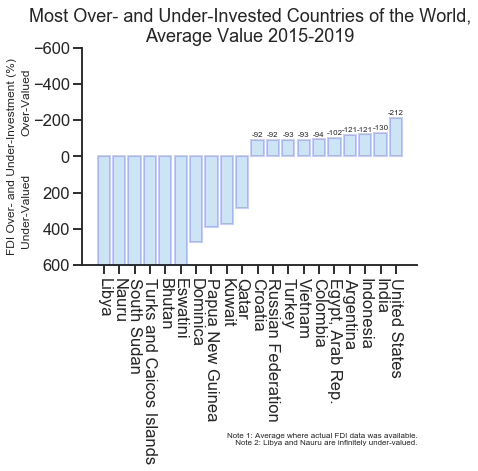

In [38]:
## Create bar chart of PE Ratios by Sector
# https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html

plt.bar(graphic_df.index.get_level_values('country'), graphic_df['Percent Difference (%)'],
       color='#007acc', alpha=0.2, edgecolor='blue', linewidth=2);
#line1, = plt.plot(djia_pe_df.index, historical_pe_ratio, label = "Average Since 2000",
#                 color = '#8b0000', linestyle='--');
#line2, = plt.plot(djia_pe_df.index, average_pe_calculated, label = "Average Today",
#                 color = '#228b22', linestyle='--');

plt.ylabel('FDI Over- and Under-Investment (%)\n', size = 12)
plt.title('Most Over- and Under-Invested Countries of the World,\nAverage Value 2015-2019')
plt.xticks(np.arange(0, 20, step=1), rotation=270)
plt.ylim(600, -600)

# zip joins x and y coordinates in pairs
for x,y,num in zip(graphic_df.index.get_level_values('country'), graphic_df['Percent Difference (%)'], np.arange(0.05, 0.99, 0.045)):

    label = "{}".format(round(y))

    if y < 0:
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,3), # distance from text to points (x,y)
                     #xy=(0.78, .85),
                     #xycoords='axes fraction',
                     ha='center',
                     size = 8) # horizontal alignment can be left, right or center
    
    #else:
    #    plt.annotate(label, # this is the text
    #                 #(x,y), # this is the point to label
    #                 #textcoords="offset points", # how to position the text
    #                 #xytext=(0,500), # distance from text to points (x,y)
    #                 xy=(num, .52),
    #                 xycoords='axes fraction',
    #                 ha='center',
    #                 size = 8) # horizontal alignment can be left, right or center
        



#plt.rcParams['axes.edgecolor']='#333F4B'
#plt.rcParams['axes.linewidth']=0.8
#plt.rcParams['xtick.color']='#333F4B'
#plt.rcParams['ytick.color']='#333F4B'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
#plt.legend([line1, line2], ['Average PE Since 2000', 'Average PE Today'], prop={'size': 10})

plt.annotate('Over-Valued\n',
            xy=(-0.15, 0.75),
            xycoords='axes fraction',
            horizontalalignment='center',
            verticalalignment='center',
            size = 12,
            rotation = 90)

plt.annotate('Under-Valued\n',
            xy=(-0.15, 0.25),
            xycoords='axes fraction',
            horizontalalignment='center',
            verticalalignment='center',
            size = 12,
            rotation = 90)

plt.annotate('Note 1: Average where actual FDI data was available.\n Note 2: Libya and Nauru are infinitely under-valued.',
            xy=(1, -.8),
            xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='center',
            size = 8)

#plt.show()
sns.despine()
plt.savefig('../../3_Outputs/Results/Predicted FDI by Country, Avg Value 2015-2019.jpg', dpi=300, bbox_inches='tight') #pad_inches = 1
#plt.close()

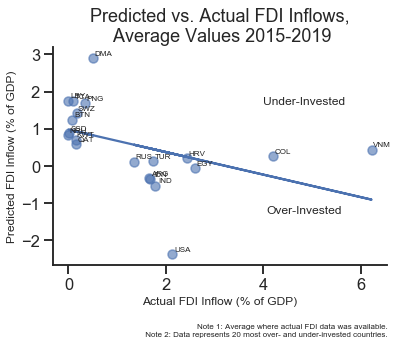

In [39]:
## Create Security Market Line

from numpy.polynomial.polynomial import polyfit

plt.scatter(graphic_df["Actual FDI Inflow (% of GDP)"], graphic_df["Predicted FDI Inflow (% of GDP)"],
           alpha = 0.6); #s = djia_today_df.marketCap

# zip joins x and y coordinates in pairs
for x,y,z in zip(graphic_df["Actual FDI Inflow (% of GDP)"], graphic_df["Predicted FDI Inflow (% of GDP)"], graphic_df.index.get_level_values('code')):

    label = "{}".format(z)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,3), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 size = 8)

plt.ylabel('Predicted FDI Inflow (% of GDP)', size = 12)
plt.xlabel('Actual FDI Inflow (% of GDP)', size = 12)
plt.title("Predicted vs. Actual FDI Inflows,\n Average Values 2015-2019")
#plt.ylim(30, -30)
#plt.autoscale(enable=True, axis='x')
#plt.xlim(30, -30)



#ax = plt.gca()
#ax.set_ylim([-30, 30])
#ax.set_xlim([-30, 30])

# Fit with polyfit
x = graphic_df["Actual FDI Inflow (% of GDP)"]
b, m = polyfit(graphic_df["Actual FDI Inflow (% of GDP)"], graphic_df["Predicted FDI Inflow (% of GDP)"], 1)

plt.plot(x, b + m * x, '-')

plt.annotate('Over-Invested',
            xy=(0.75, 0.25),
            xycoords='axes fraction',
            horizontalalignment='center',
            verticalalignment='center',
            size = 12)

plt.annotate('Under-Invested',
            xy=(0.75, 0.75),
            xycoords='axes fraction',
            horizontalalignment='center',
            verticalalignment='center',
            size = 12)

plt.annotate('Note 1: Average where actual FDI data was available.\n Note 2: Data represents 20 most over- and under-invested countries.',
            xy=(1, -.3),
            xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='center',
            size = 8)

#plt.show()
#plt.figure(figsize=(20,10))
sns.despine()
plt.savefig('../../3_Outputs/Results/Actual Vs Predicted FDI by Country, Avg Value 2015-2019.jpg', dpi=300, bbox_inches='tight')
#plt.close()

In [40]:
## Country Map
## /Users/jschneids13/Desktop/Harvard Kennedy School MPA-ID/Semesters/Semester 3, Fall 2019/GOV 1021 Geospatial/GOV-1021-Geospatial-Project

import folium
import os
import json
import palettable
from palettable.colorbrewer.qualitative import Dark2_7

# Create a folium map object.
my_map = folium.Map(location=[0, 0], zoom_start=2)

# You have to download this file and set the directory where you saved it
with open('../../2_Inputs/World Countries/world-countries.json') as f: ##'/Users/jschneids13/Desktop/us-states.json'
    country_geo = json.load(f)
    
# Add the color for the chloropleth for built environment:
my_map.choropleth(
 geo_data=country_geo,
 name='Over- and Under-Investment',
 data=map_df,
 columns=[map_df.index.get_level_values('country'), 'Percent Difference (%)'],
 key_on='feature.properties.name',
 fill_color='RdBu', ##Dark2_7
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='FDI Valuation'
)


# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

## Save
my_map.save('../../3_Outputs/Map/FDI Valuation by Country.html')